In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-14, 10)
alpha=1
marker='o'
s=10
legend=False
linewidth=0
plt.rcParams["figure.figsize"] = (20,20)


In [23]:
WT__Dpf_3_null_small_RNA = pd.read_csv("/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/01_small_RNA_seq_15_C/results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
                                       header=0,
                                       sep="\t")
WT__Dpf_3_null_small_RNA.set_index(["id", "taxonomy_id", "gene_name", "sequence", "status", "gene_biotype"], inplace=True)
WT__Dpf_3_null_small_RNA.columns = WT__Dpf_3_null_small_RNA.columns + "_small_RNA"

In [24]:
WT__Dpf_3_null_total_RNA = pd.read_csv("/tungstenfs/scratch/ggrossha/gypafoiv/projects/GROUP_PROJECTS/rajani/small_RNAs_Rajani/02_total_RNAseq_15_C/results/filter/DE_htseq_count_alignment_unique_mappers__reverse__WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv",
                                       header=0,
                                       sep="\t")
WT__Dpf_3_null_total_RNA.set_index(["id", "taxonomy_id", "gene_name", "sequence", "status", "gene_biotype"], inplace=True)
WT__Dpf_3_null_total_RNA.columns = WT__Dpf_3_null_total_RNA.columns + "_total_RNA"

In [25]:
WT__Dpf_3_null = pd.merge(WT__Dpf_3_null_small_RNA, WT__Dpf_3_null_total_RNA, 
                          on=["id", "taxonomy_id", "gene_name", "sequence", "status", "gene_biotype"], 
                          how="outer")

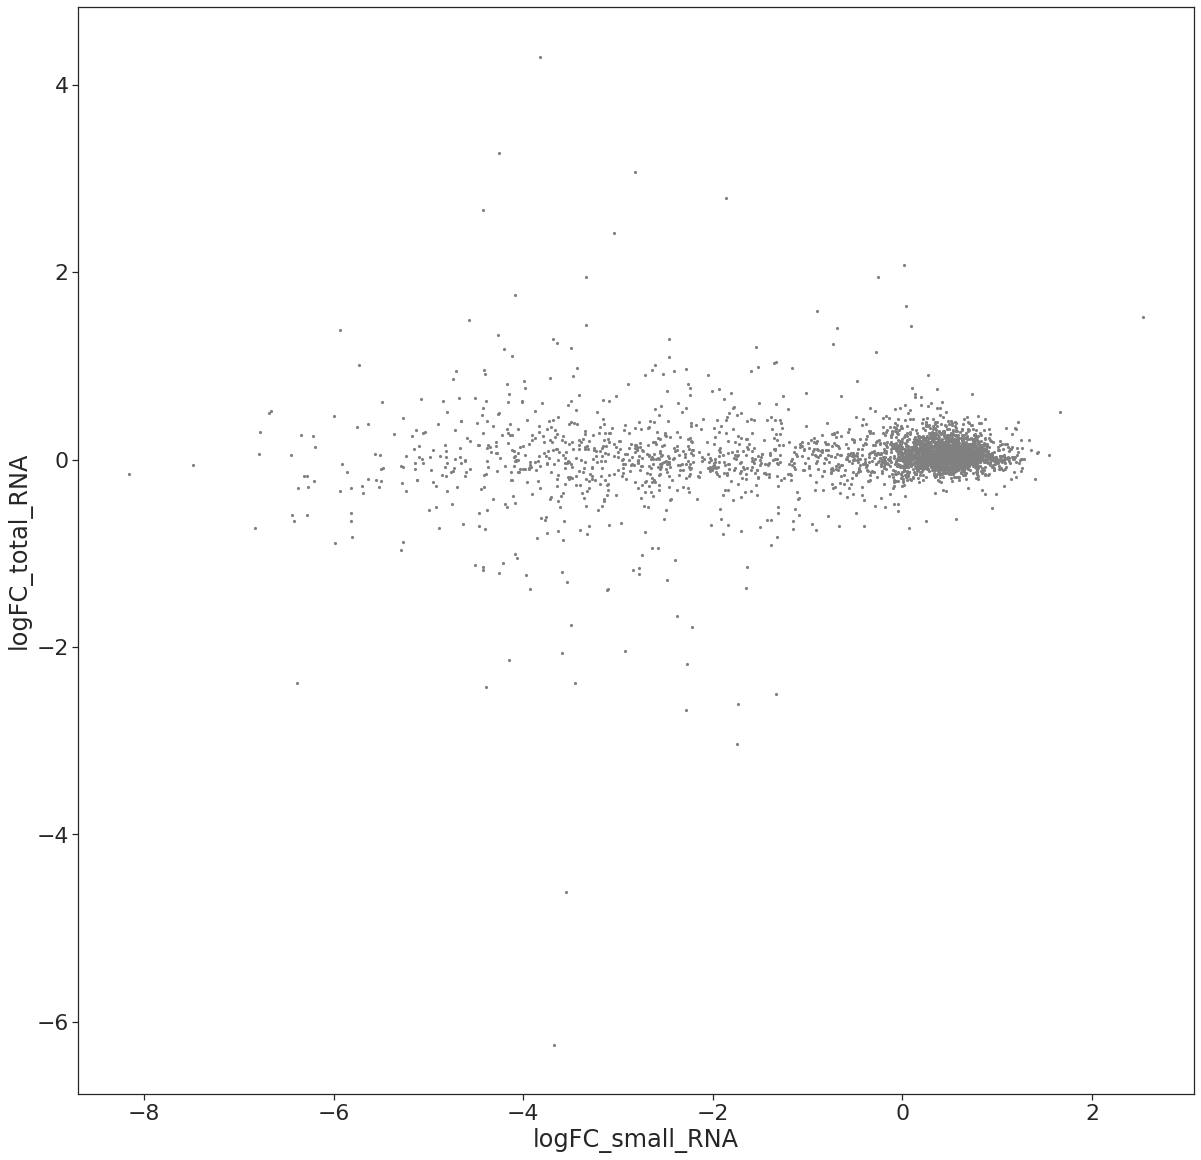

In [26]:
sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__Dpf_3_null,
                           s=s,
                           color="gray",
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

In [27]:
WT__Dpf_3_null["FDR_small_RNA"].fillna(1, inplace=True)
WT__Dpf_3_null["FDR_total_RNA"].fillna(1, inplace=True)
WT__Dpf_3_null.fillna(0, inplace=True)

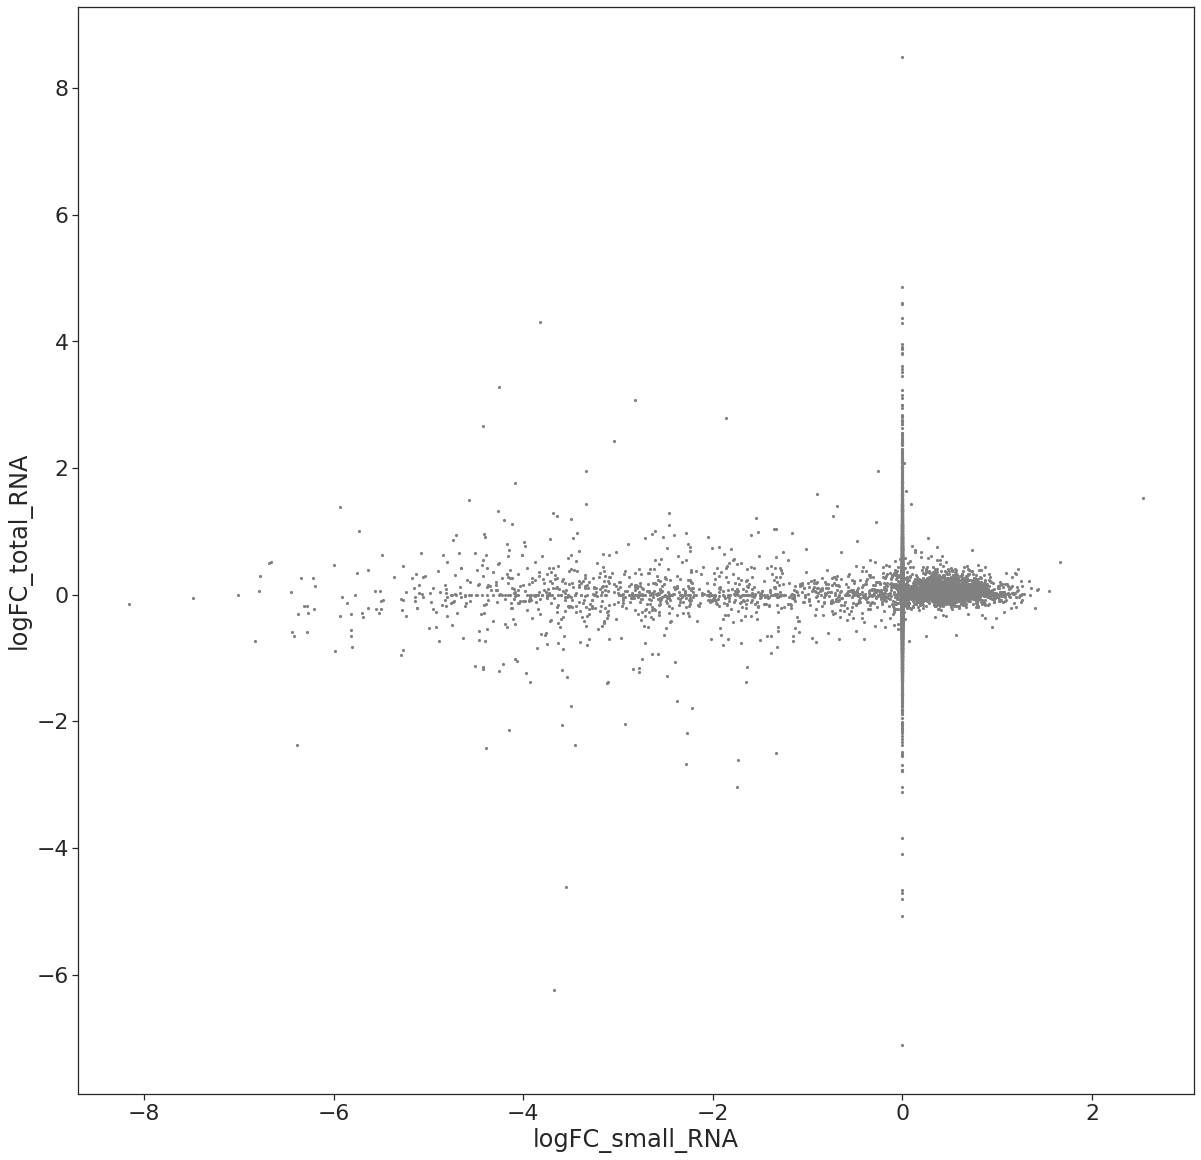

In [28]:
sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__Dpf_3_null,
                           s=s,
                           color="gray",
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

In [29]:
WT__Dpf_3_null["Significant"] = "No"
WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_small_RNA"]<0.05, "Significant"] = "small_RNA"
WT__Dpf_3_null.loc[WT__Dpf_3_null["FDR_total_RNA"]<0.05, "Significant"] = "total_RNA"
WT__Dpf_3_null.loc[((WT__Dpf_3_null["FDR_small_RNA"]<0.05) & (WT__Dpf_3_null["FDR_total_RNA"]<0.05)), "Significant"] = "both"

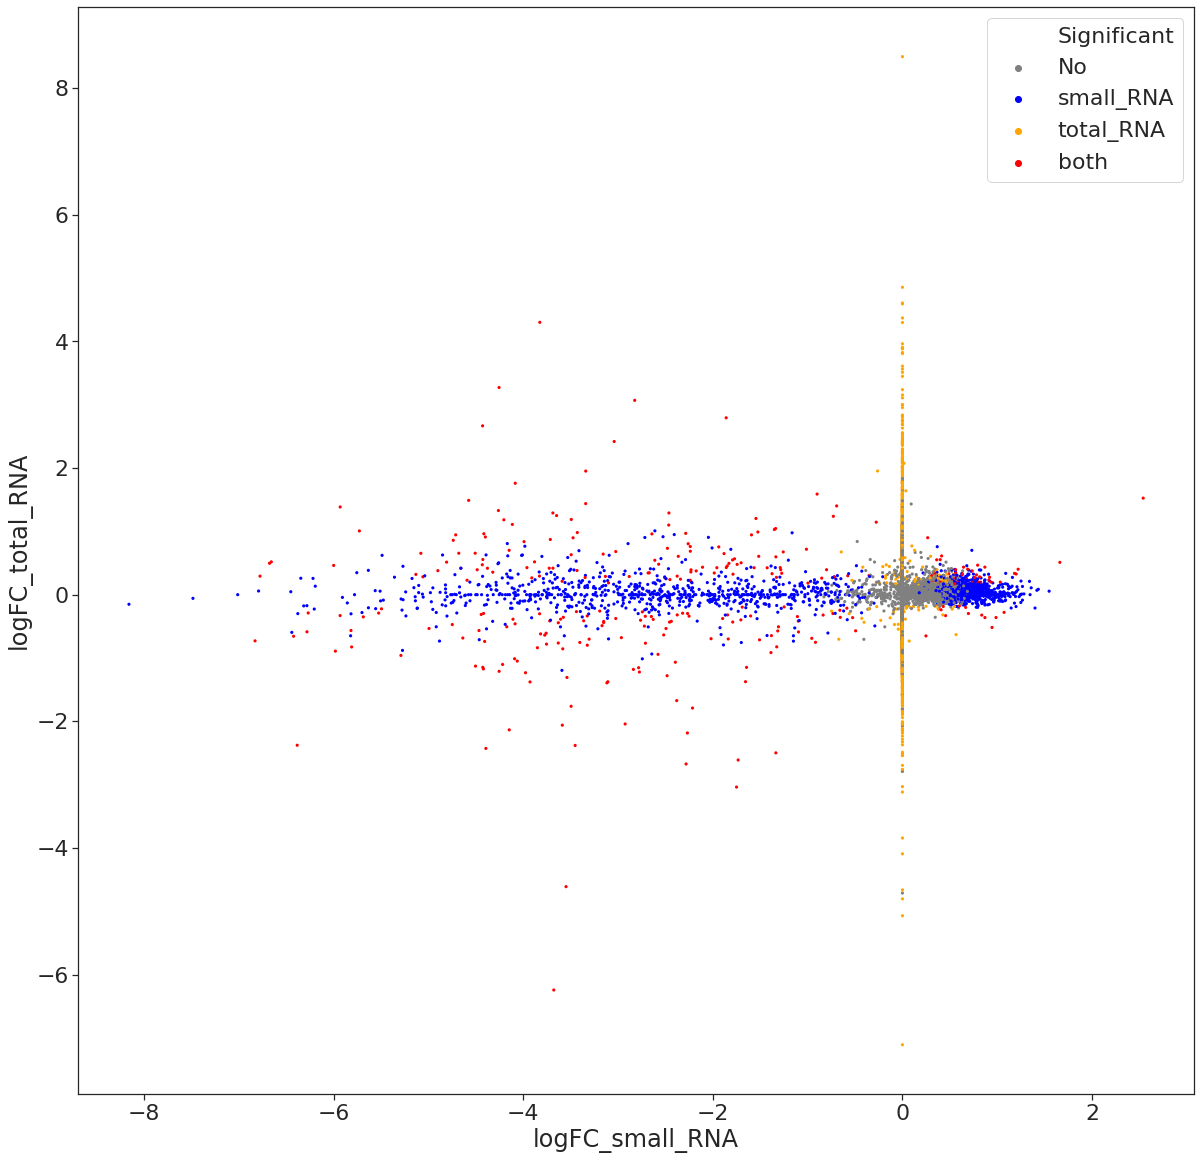

In [30]:
sns_plot = sns.scatterplot(x="logFC_small_RNA",
                           y="logFC_total_RNA",
                           data=WT__Dpf_3_null,
                           s=s,
                           hue="Significant",
                           hue_order=["No", "small_RNA", "total_RNA", "both"],
                           palette=["gray", "blue", "orange", "red"],
                           alpha=alpha,
                           x_jitter=x_jitter,
                           y_jitter=y_jitter,
                           linewidth=linewidth)

In [31]:
WT__Dpf_3_null["Significant"].value_counts()

No           10263
total_RNA     2939
small_RNA     1680
both           310
Name: Significant, dtype: int64